# Project 2 -  Modelling with ordinary differential equations

## By Mattis Sørensen, Tore Nygård and Mai-Helen Braathen

### Abstract:

### Introduction:



### Part 1

#### Exercise 1.1 :

#### The purpose of trying to model the decline in population as −aN is because a is a positive constant related to the decline in population. The model assumes that as the population size increases, the growth rate decreases, and as the population size decreases, the growth rate increases. The purpose of modeling the decline in population as -a is to create a more realistic representation of population dynamics. The incorporation of the decline in population as -a in the model allows it to capture the idea that population growth is not unlimited but depends on the population's size relative to its carrying capacity.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math

#### Exercise 1.2 :

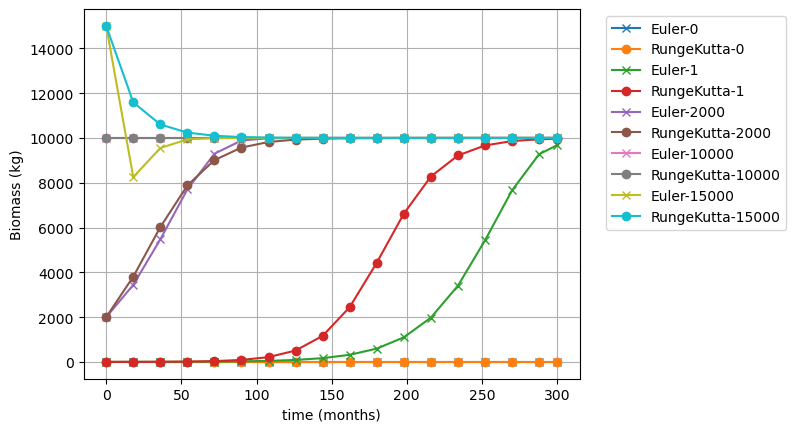

In [107]:



def main():
    x=0.0  # Start of integration
    xStop=25*12  # End of integration
    y=np.array([0])  #Initial conditions
    y1 = np.array([1])
    y2 = np.array([2000])
    y3 = np.array([10000])
    y4 = np.array([15000])
    h1=18  # Step size
    # h2=12
    # h3 = 6
    # h4 = 1
    X1,Y1=integrate_euler(F,x,y,xStop,h1)
    X2,Y2=integrate_rungk4(F,x,y,xStop,h1)
    X3,Y3=integrate_euler(F,x,y1,xStop,h1)
    X4,Y4=integrate_rungk4(F,x,y1,xStop,h1)
    X5,Y5=integrate_euler(F,x,y2,xStop,h1)
    X6,Y6=integrate_rungk4(F,x,y2,xStop,h1)
    X7,Y7=integrate_euler(F,x,y3,xStop,h1)
    X8,Y8=integrate_rungk4(F,x,y3,xStop,h1)
    X9,Y9=integrate_euler(F,x,y4,xStop,h1)
    X10,Y10=integrate_rungk4(F,x,y4,xStop,h1)
    #YEx = 100*X2-5*X2*X2+990*(np.exp(-0.1*X2)-1)
    
    

    #Exact solution
    timestep = 1 #Use month as timeunit

    starttime = 0
    endtime = 12*25 #Number of months that shall be simulated

    k = 10000 #kg
    r = 0.6/12 #Per month

    N0 = 20000 #inital biomass in kg

    T1 = []
    YExact = []

    t =starttime
    y = N0

    YExact.append(y)
    T1.append(t)

    while (t<endtime):
        t = t+timestep
        
        y=N0*k/(N0+(k-N0)*math.exp(-r*t)) #exact solution
        T1.append(t)
        YExact.append(y)
        
    #plt.plot(T1,YExact)
    plt.plot(X1,Y1[:,0],'-x',X2,Y2[:,0],'o-') #Euler and RungeKutta
    plt.plot(X3,Y3[:,0],'-x',X4,Y4[:,0],'o-') 
    plt.plot(X5,Y5[:,0],'-x',X6,Y6[:,0],'o-') 
    plt.plot(X7,Y7[:,0],'-x',X8,Y8[:,0],'o-') 
    plt.plot(X9,Y9[:,0],'-x',X10,Y10[:,0],'o-')
    plt.legend(['Euler-0','RungeKutta-0', 'Euler-1','RungeKutta-1', 'Euler-2000','RungeKutta-2000', 'Euler-10000','RungeKutta-10000','Euler-15000','RungeKutta-15000'],bbox_to_anchor=(1.04, 1))
    
    plt.grid(True)
    plt.xlabel('time (months)')
    plt.ylabel('Biomass (kg)')
    plt.show()
    
#Eulers method
def integrate_euler(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)
#Rungekutta 4th order
def integrate_rungk4(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y + run_kut4(F,x,y,h)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

#Rungekutta
def run_kut4(F,x,y,h):
  #  4th order Runge Kutta Method 
    K0=h*F(x,y)
    K1=h*F(x+0.5*h,y+0.5*K0)
    K2=h*F(x+0.5*h,y+0.5*K1)
    K3=h*F(x+h,y+K2)
    
    return (K0+2*K1+2*K2+K3)/6.0



def F(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    F=np.zeros(1)
    F[0] = r*(1-y[0]/K)*y[0] 
    return F
    
main()    

## This is a comparison of the differences at a timestep of 18 months, between the exact solution, eulers method and rungkutta

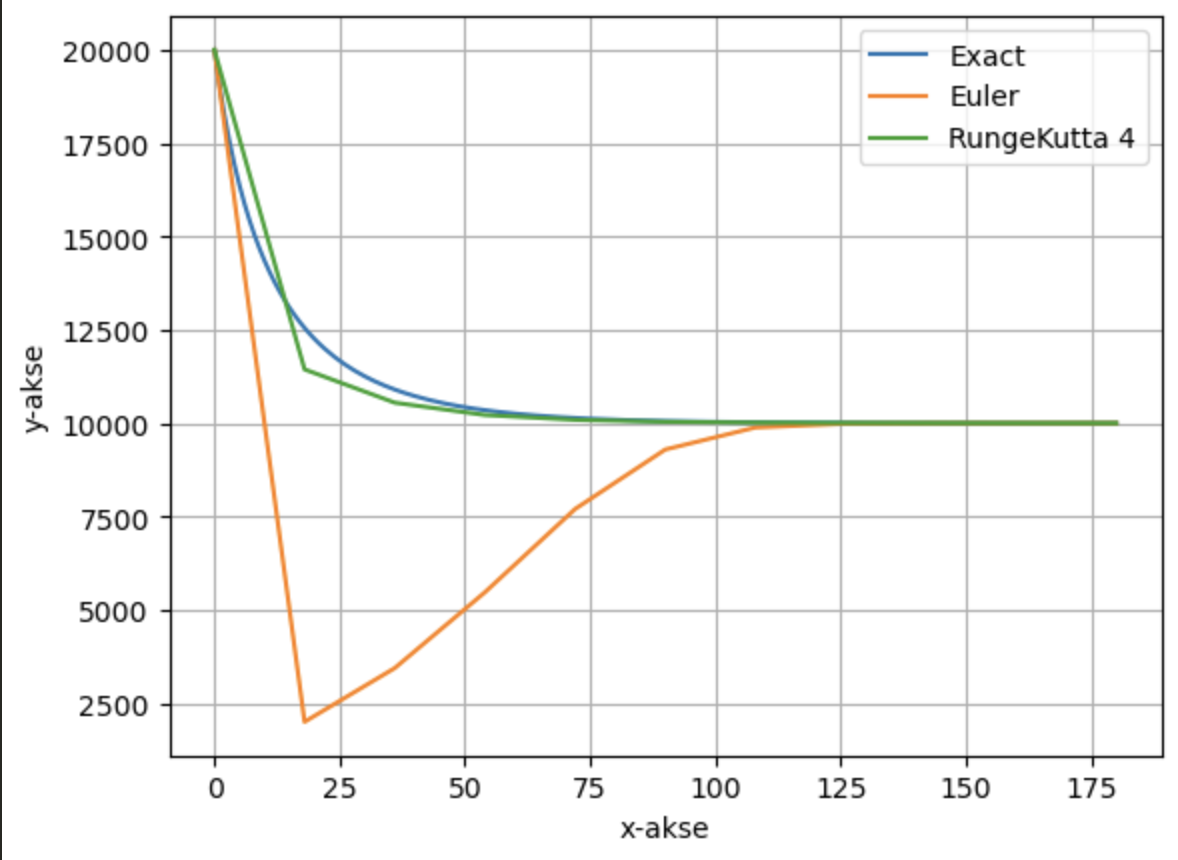!
## This is a comparison of every method with every timestep
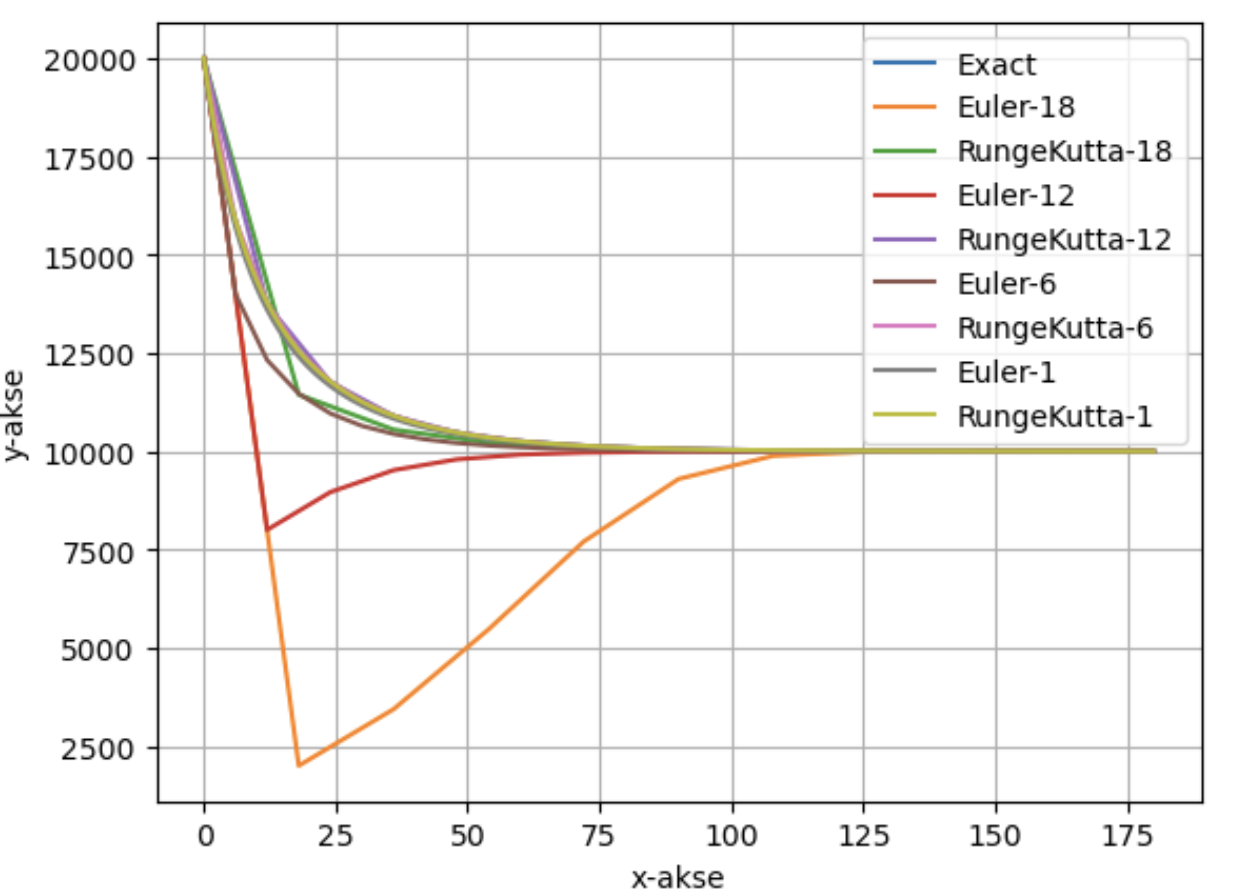
## This is a comparison of the different timesteps and how it influences euler
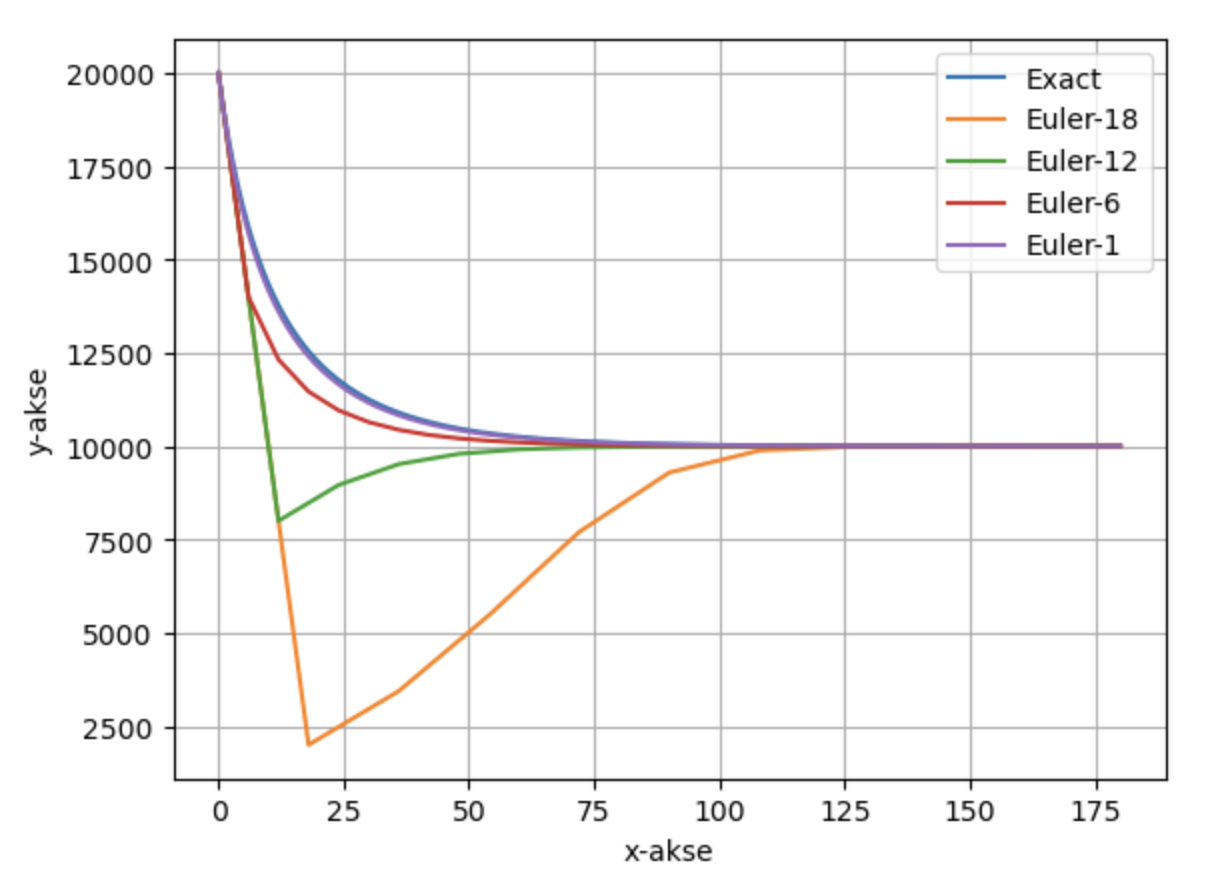
## This is a comparison of the different timesteps and how it influences RungeKutta 
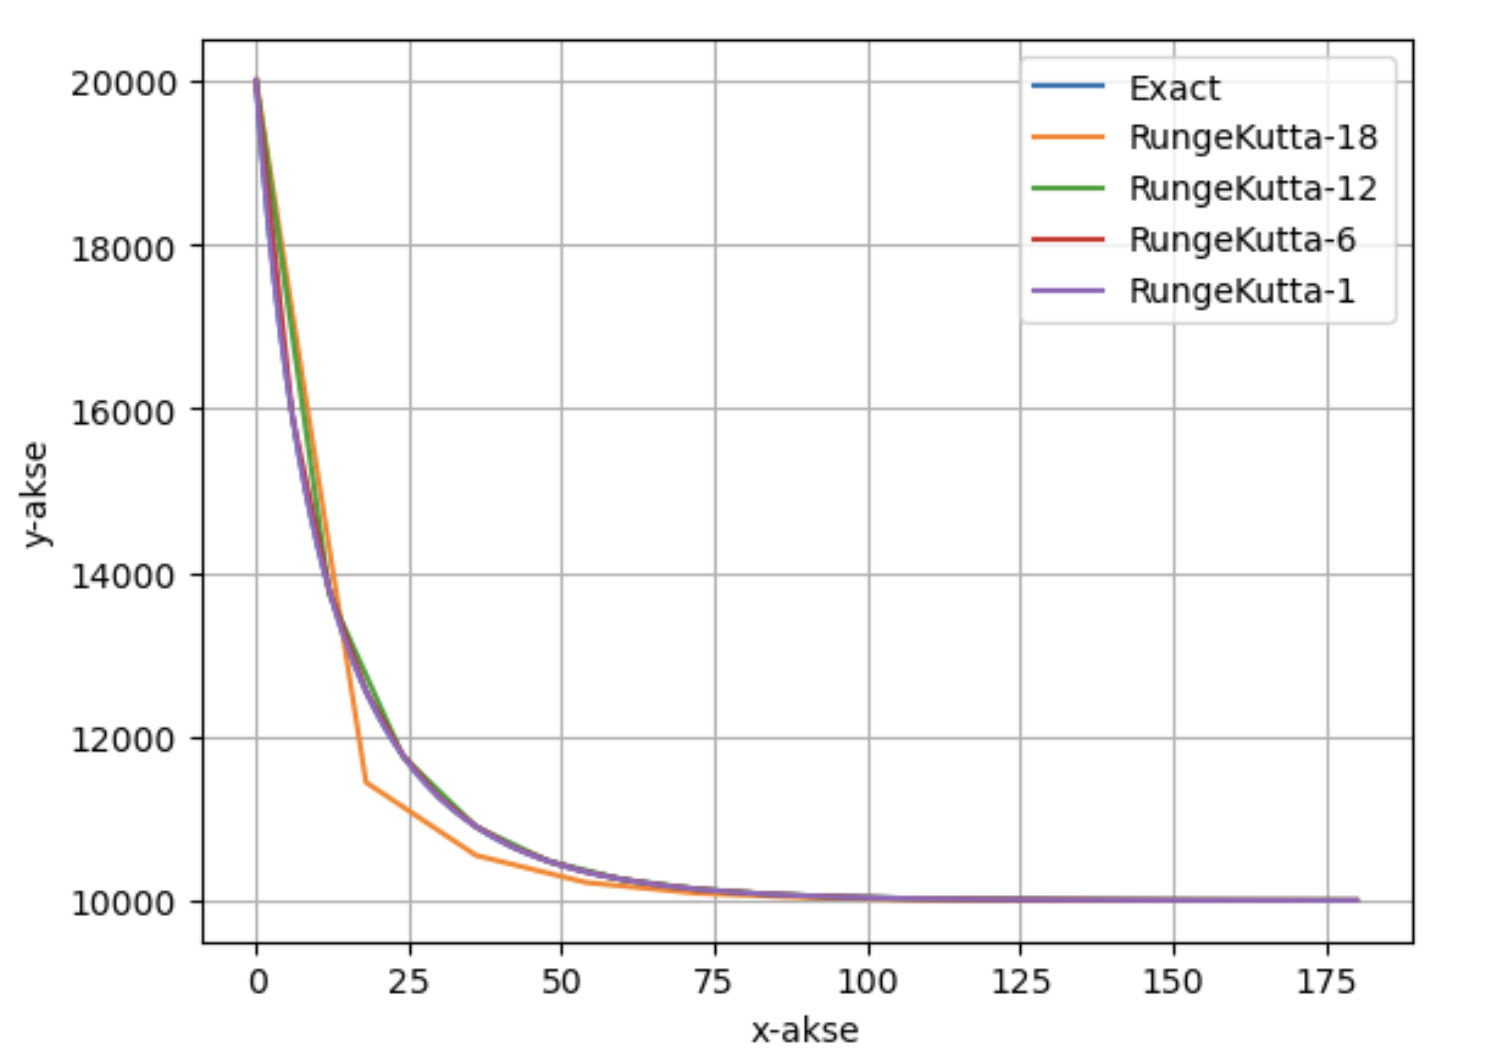

#### We can observe that the 4th order Runge Kutta method approaches the exact solution much faster than the Euler method. We observe that a time step of 12 is close to sufficient for Runge Kutta, while for Euler we have to approach a timestep close to 1, for similar results. 

#### Since the 4th order Runge Kutta method is a higher order than Euler´s, RK4 has smaller errors per step and better error accumulation properties. 
#### In different terms, the steps in Euler is proportional to the step size squared, and in RK4 it is proprotional to the step size to the power of 4. This means that if we halve the step size of euler, the error decreases by a factor of 4, and half the step size of RK4 leads to a error decrease by a factor of 16. 

## Exercise 1.3

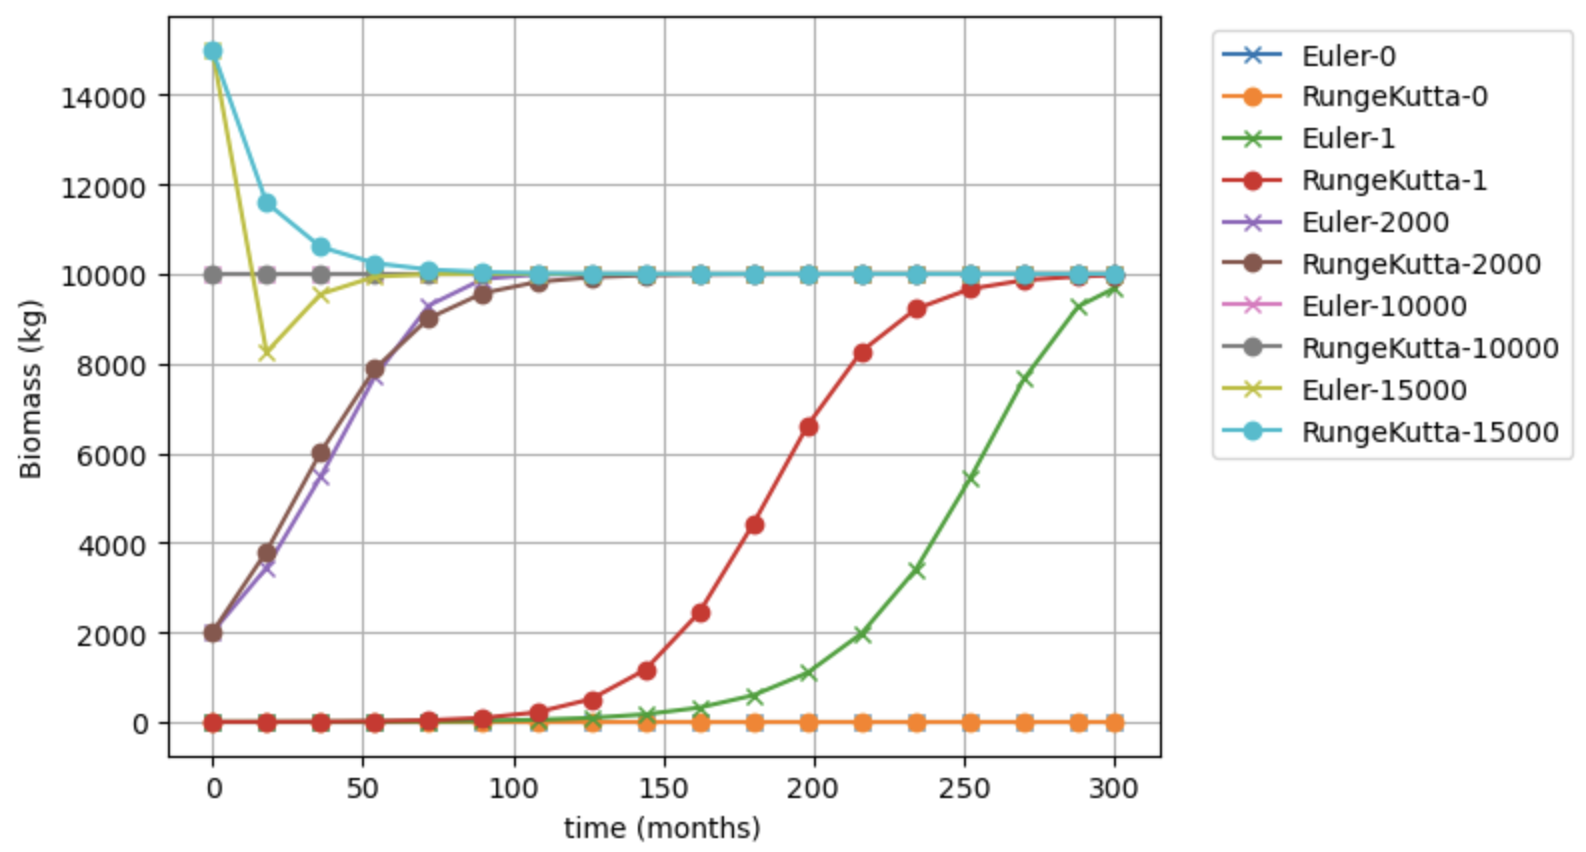

### Graph showing the comparisons of different initual values and methods

### From the graph we can observe that populations with an initial value of 0kg never starts growing, this makes sense as a biomass of 0 means it does not exist. From the graph we can see that an initial biomass of 1kg grows faster using the rungekutta method, versus what we observe in the euler method. <span style="color:red">(Differences between Euler and Runge Kutta aside, this result is interesting because potentially starting a biomass with 1 fish for example would not grow in real life.)</span>

### We can also observe that Runge Kutta has a faster increase, as well as decrease in growth, and that a starting biomass of 10000kg stays stable at exactly 10000kg. One key observation is that Euler´s starting at 15000 dips below the carrying capacity between 10 and 50 months, caused by the larger error per step size compared to RK4.

## Exercise 1.4

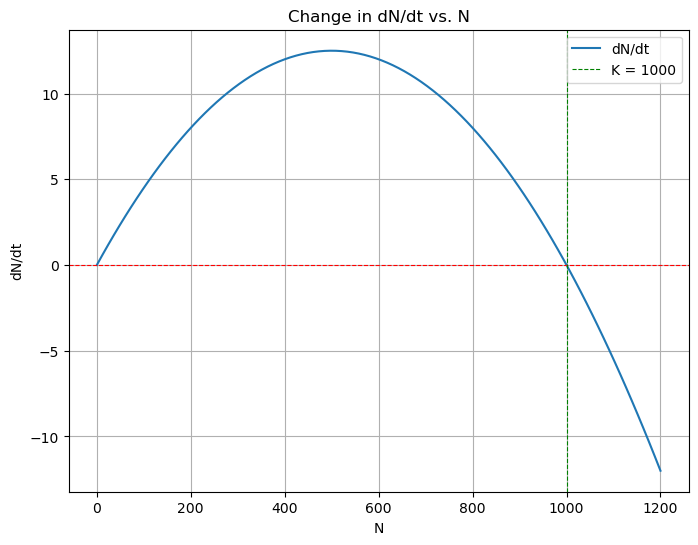

In [66]:


# Parameters
r = 0.6/12  # Growth rate
K = 1000  # Carrying capacity

# Values of N to study
N_values = np.linspace(0, 1200, 100)  

# Calculate dN/dt for each N value
dN_dt_values = r * N_values * (1 - N_values / K) 

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(N_values, dN_dt_values, label='dN/dt')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)  # Add a horizontal line at y=0
plt.axvline(K, color='green', linestyle='--', linewidth=0.8, label=f'K = {K}')  # Vertical line at K
plt.title('Change in dN/dt vs. N')
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.legend()
plt.grid(True)
plt.show()


### From the plot we can observe that the rate of change dN/dt is 0 when N = 0 and N = 1000. This is because there is no growth when the biomass is non-existent, and at N=1000 we have hit the maximum carrying capacity, where the amount of fish that die cancel out the growth.

### It can also be observed that when N = K, where K is the carrying capacity, the rate of growth becomes negative by an increasing rate, meaning the further above max carrying capacity the current biomass is, the greater the rate of decline will be. This can also be observed by looking at Euler-15000 and RungeKutta-15000 in the previous exercise.

### <span style="color:red">Similarly we can observe that the rate of growth is the greatest at N = K/2 or N = 5000 in the previous plot. </span>




## Exercise 1.5

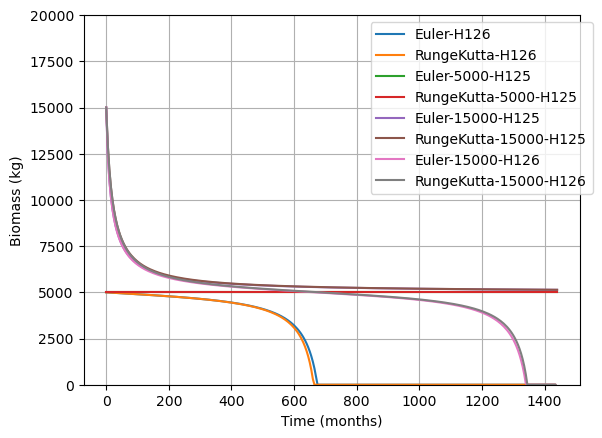

In [106]:



def main():
    x=0.0  # Start of integration
    xStop=120*12  # End of integration
    y=np.array([5000])  #Initial conditions
    y1 = np.array([15000])
    # y2 = np.array([2000])
    # y3 = np.array([10000])
    # y4 = np.array([15000])
    h1=5  # Step size
    # h2=12
    # h3 = 6
    # h4 = 1
    X1,Y1=integrate_euler(F3,x,y,xStop,h1)
    X2,Y2=integrate_rungk4(F3,x,y,xStop,h1)
    X3,Y3=integrate_euler(F2,x,y,xStop,h1)
    X4,Y4=integrate_rungk4(F2,x,y,xStop,h1)
    X5,Y5=integrate_euler(F2,x,y1,xStop,h1)
    X6,Y6=integrate_rungk4(F2,x,y1,xStop,h1)
    X7,Y7=integrate_euler(F3,x,y1,xStop,h1)
    X8,Y8=integrate_rungk4(F3,x,y1,xStop,h1)
    # X9,Y9=integrate_euler(F,x,y4,xStop,h1)
    # X10,Y10=integrate_rungk4(F,x,y4,xStop,h1)
    #YEx = 100*X2-5*X2*X2+990*(np.exp(-0.1*X2)-1)
    
    #plt.plot(T1,YExact)
    plt.plot(X1,Y1[:,0],'-',X2,Y2[:,0],'-') #Euler and RungeKutta
    plt.plot(X3,Y3[:,0],'-',X4,Y4[:,0],'-') 
    plt.plot(X5,Y5[:,0],'-',X6,Y6[:,0],'-') 
    plt.plot(X7,Y7[:,0],'-',X8,Y8[:,0],'-') 
    # plt.plot(X9,Y9[:,0],'-x',X10,Y10[:,0],'o-')
    plt.legend(['Euler-H126','RungeKutta-H126','Euler-5000-H125','RungeKutta-5000-H125','Euler-15000-H125','RungeKutta-15000-H125','Euler-15000-H126','RungeKutta-15000-H126'],bbox_to_anchor=(1.04, 1))
    plt.ylim(ymin=0,ymax= 20000)
    plt.grid(True)
    plt.xlabel('Time (months)')
    plt.ylabel('Biomass (kg)')
    plt.show()
    
#Eulers method
def integrate_euler(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)
#Rungekutta 4th order
def integrate_rungk4(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y + run_kut4(F,x,y,h)
       
        
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

#Rungekutta
def run_kut4(F,x,y,h):
  #  4th order Runge Kutta Method 
    K0=h*F(x,y)
    K1=h*F(x+0.5*h,y+0.5*K0)
    K2=h*F(x+0.5*h,y+0.5*K1)
    K3=h*F(x+h,y+K2)
    
    return (K0+2*K1+2*K2+K3)/6.0

def F3(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    H = 126
    F=np.zeros(1)
    if y[0] < 0:
        y[0] = 0
    F[0] = (r*(1-y[0]/K)*y[0] ) - H
    return F

def F2(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    H = 125
    F=np.zeros(1)
    if y[0] < 0:
        y[0] = 0
    F[0] = (r*(1-y[0]/K)*y[0] ) - H
    return F
def F(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    F=np.zeros(1)
    F[0] = r*(1-y[0]/K)*y[0] 
    return F
    
main()    

### H=50
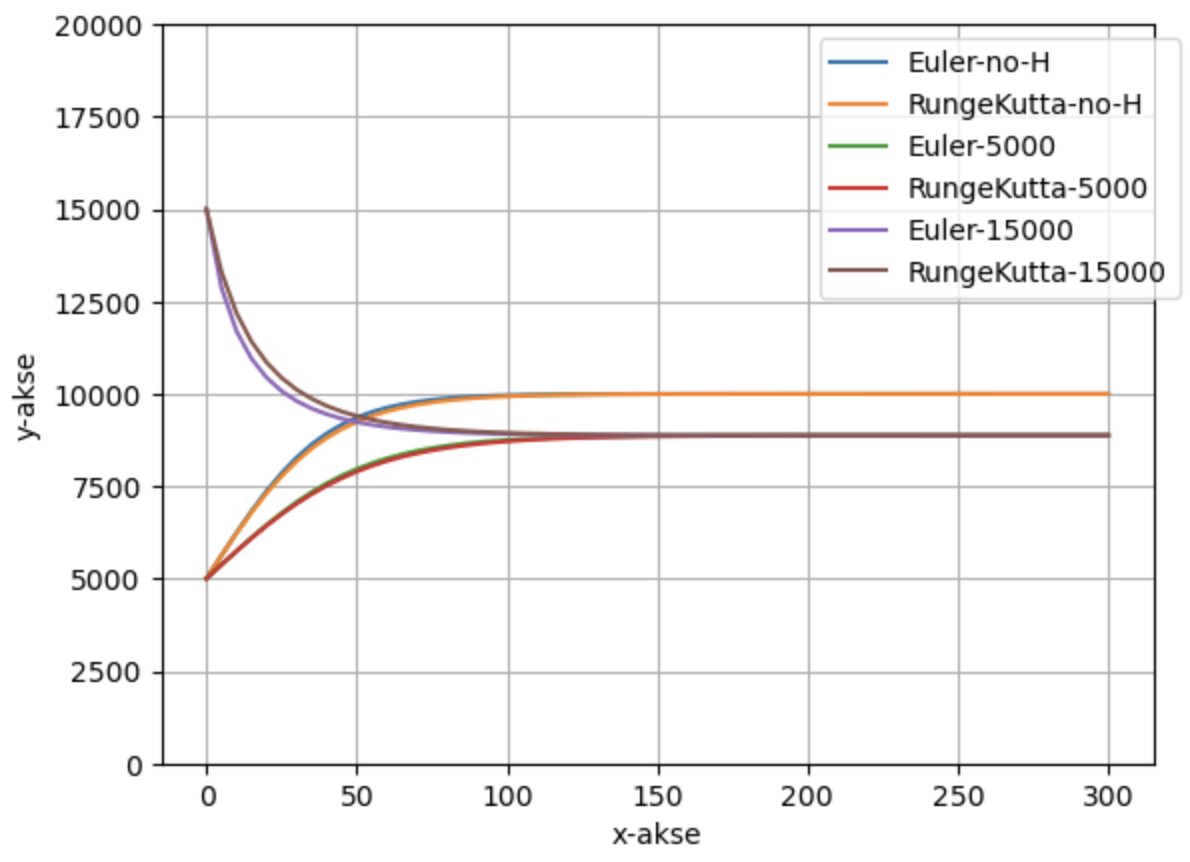
## H=100
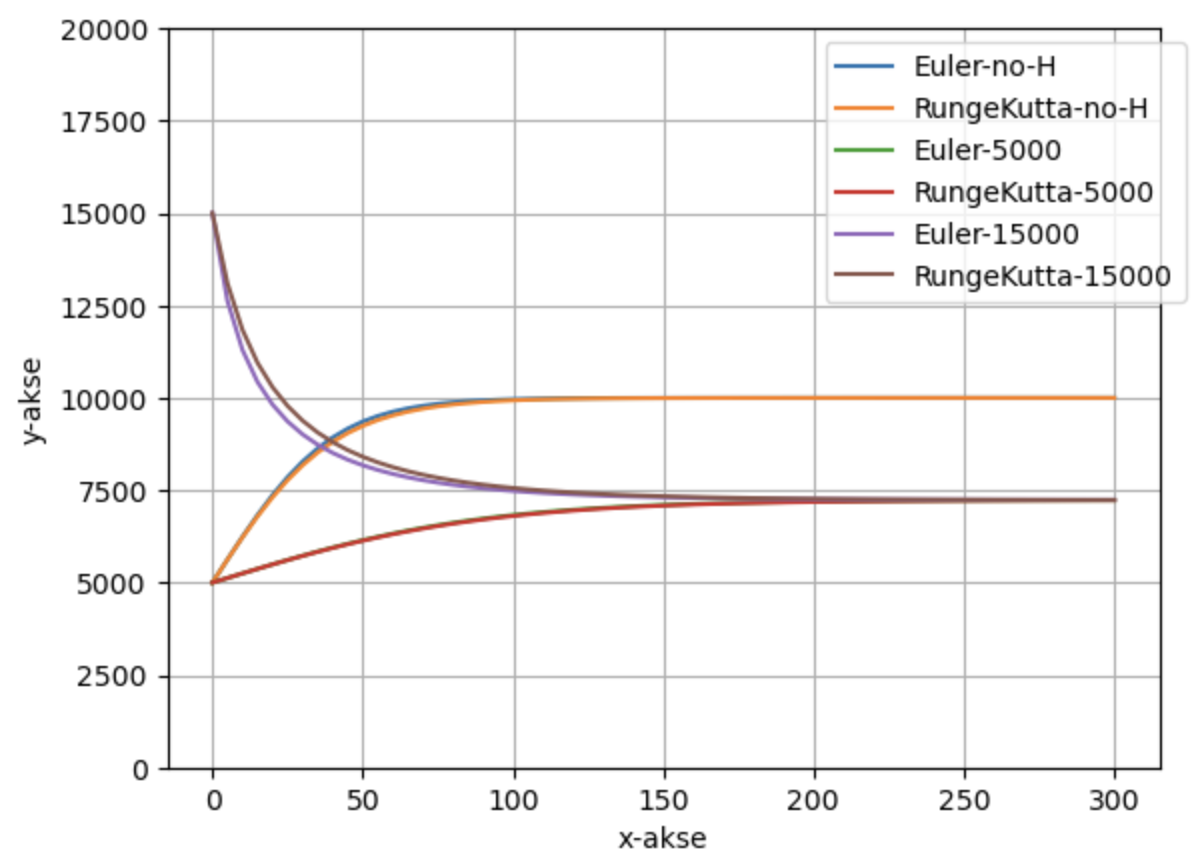
## H=120
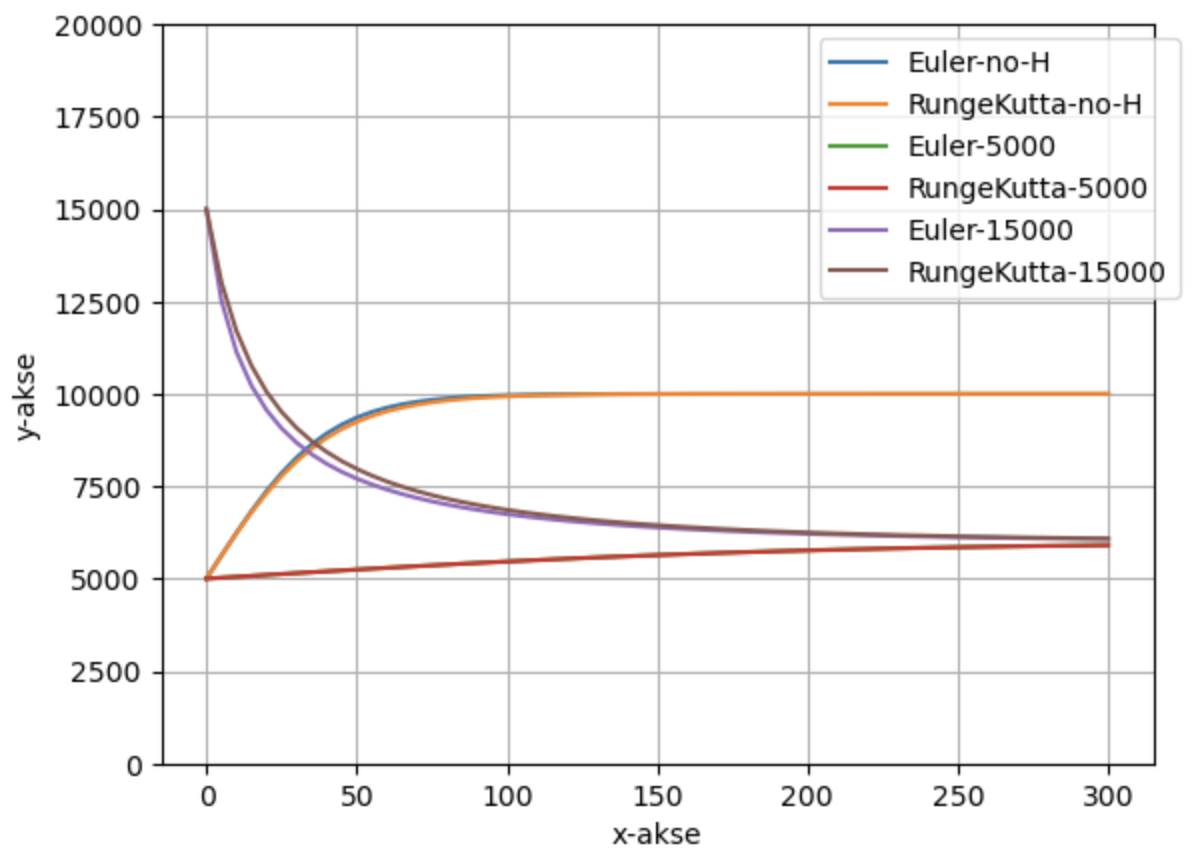
## H=150
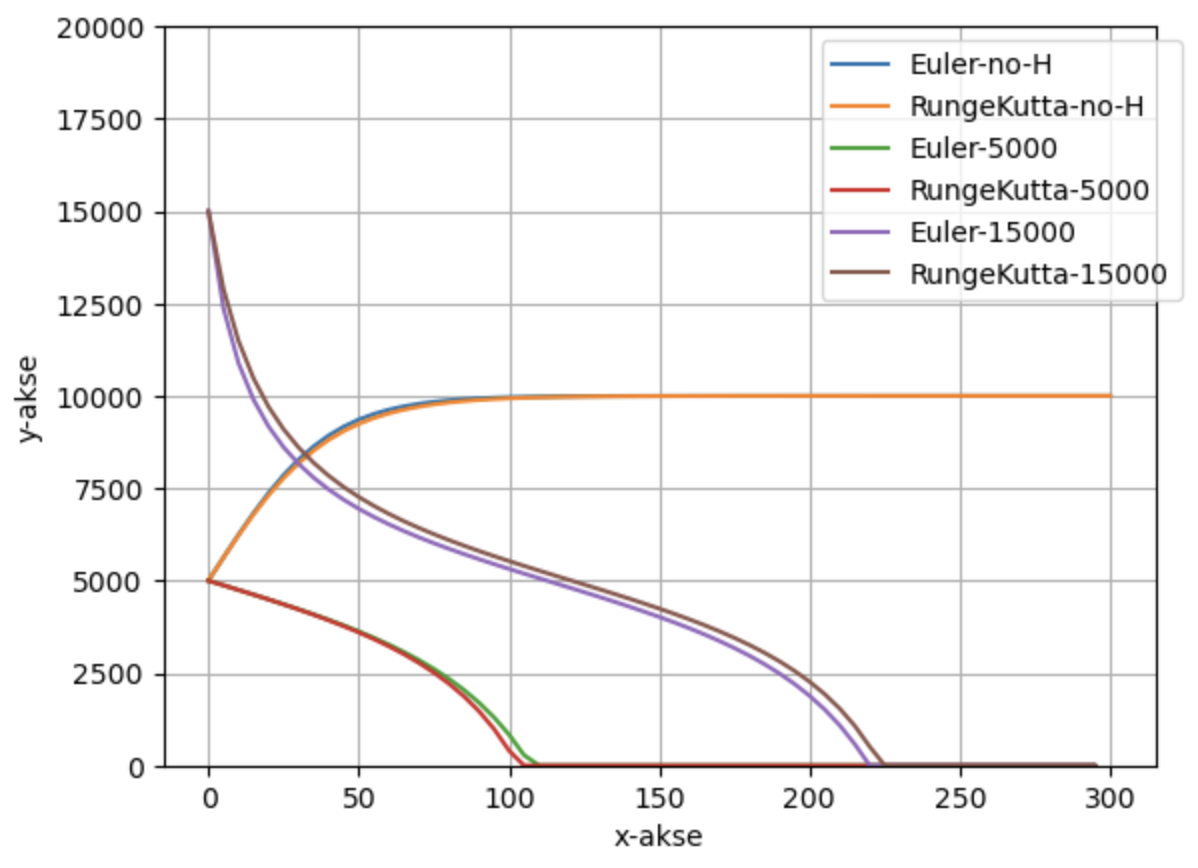

### From these plots we can see that an increase in the value of H results in the population stabilizing at a lower value of N, proportionally to the increase in H. The time for the population to become stable also takes longer, this can more easily be seen when H > 120, if we assume stability as the convergence of the RK and Euler plots at a value of N, and a stable value of N.

### For H = 150 we see the population go extinct after ca. 100 months for a starting population of 5000kg and ca. 225 months for a starting population of 15000kg.

### Excercise 1.6

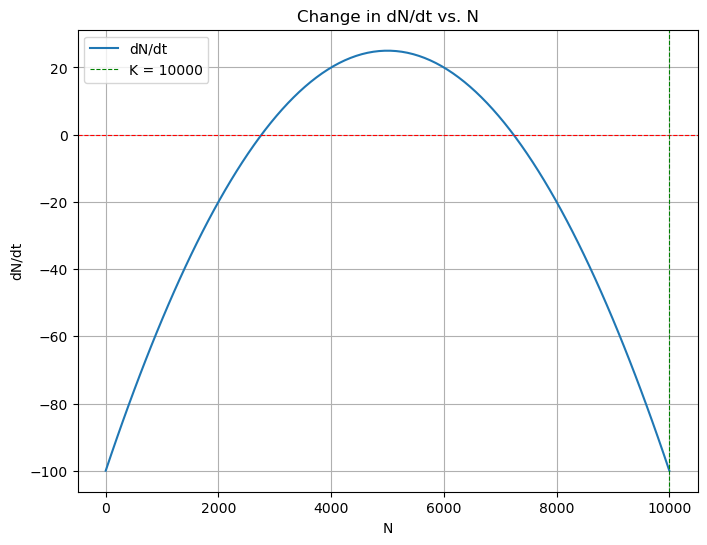

In [105]:


# Parameters
r = 0.6/12  # Growth rate
K = 10000  # Carrying capacity

# Values of N to study
N_values = np.linspace(0, 10000, 100)  

# Calculate dN/dt for each N value
dN_dt_values = r * N_values * (1 - N_values / K) - 100

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(N_values, dN_dt_values, label='dN/dt')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)  # Add a horizontal line at y=0
plt.axvline(K, color='green', linestyle='--', linewidth=0.8, label=f'K = {K}')  # Vertical line at K
plt.title('Change in dN/dt vs. N')
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.legend()
plt.grid(True)
plt.show()


![Screenshot 2023-09-27 at 15.20.07.png](<attachment:Screenshot 2023-09-27 at 15.20.07.png>)
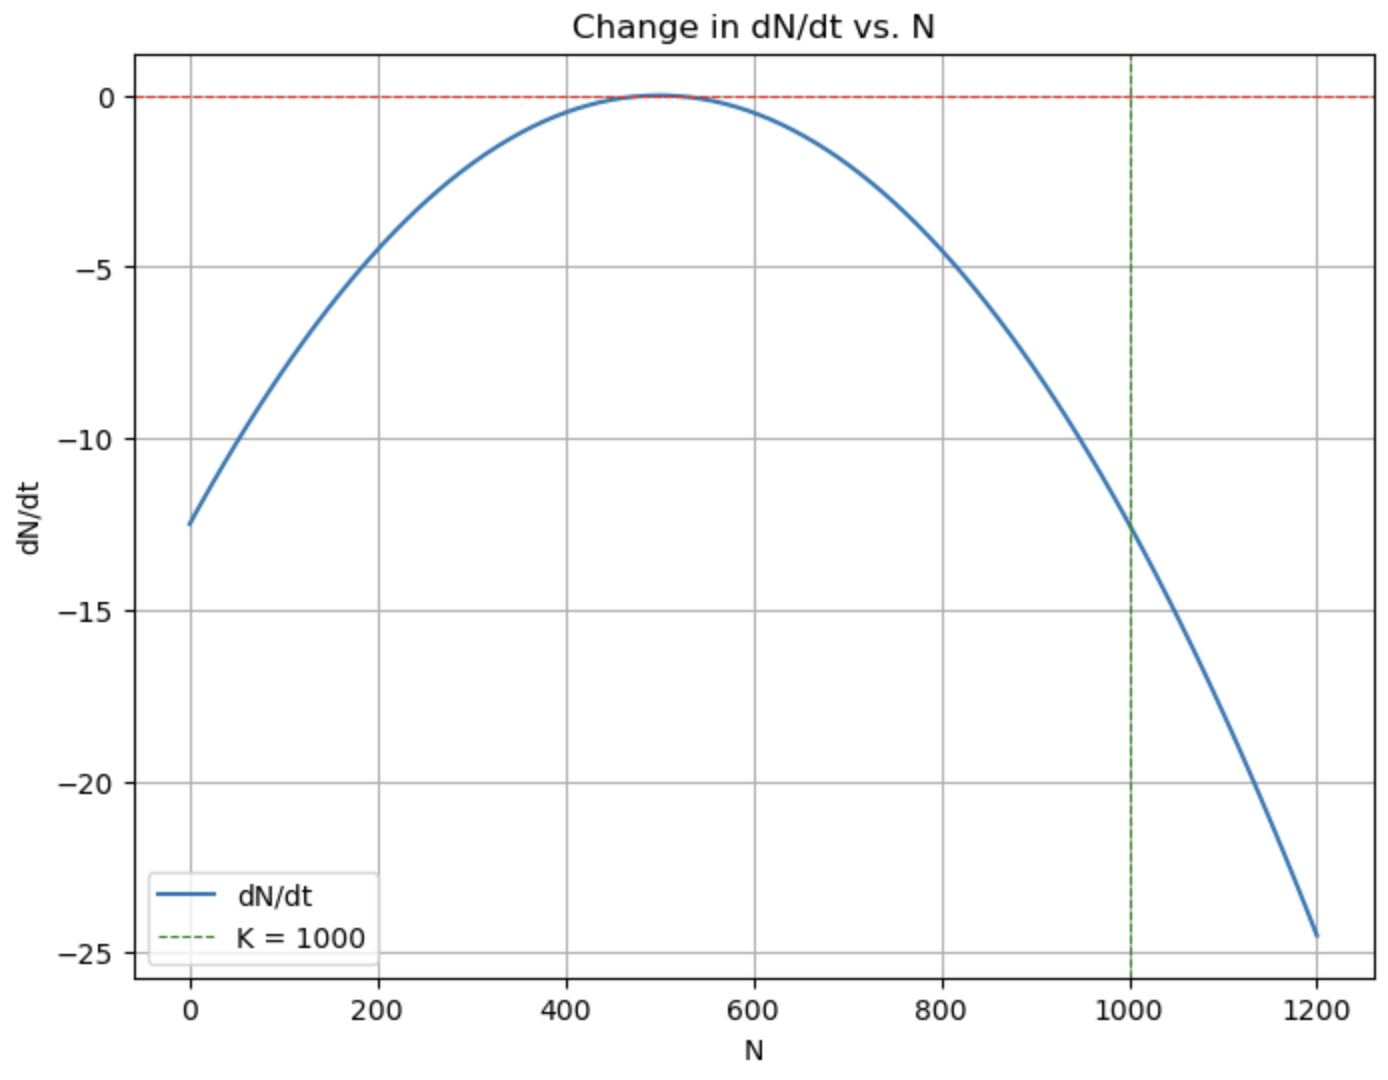

### Excercise 1.8 

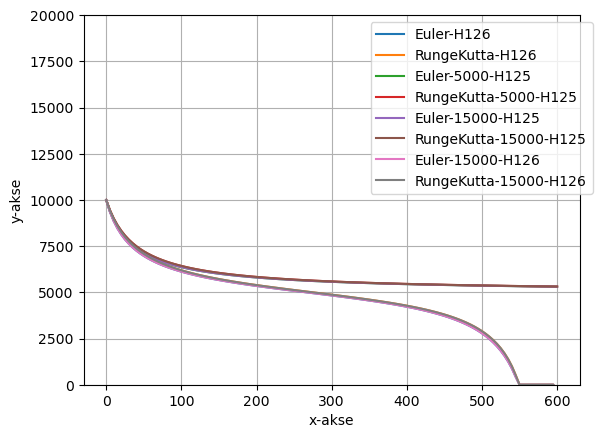

In [95]:



def main():
    x=0.0  # Start of integration
    xStop=50*12  # End of integration
    y=np.array([10000])  #Initial conditions
   
    h1=5  # Step size
    
    X1,Y1=integrate_euler(F3,x,y,xStop,h1)
    X2,Y2=integrate_rungk4(F3,x,y,xStop,h1)
    X3,Y3=integrate_euler(F2,x,y,xStop,h1)
    X4,Y4=integrate_rungk4(F2,x,y,xStop,h1)
    X5,Y5=integrate_euler(F2,x,y,xStop,h1)
    X6,Y6=integrate_rungk4(F2,x,y,xStop,h1)
    X7,Y7=integrate_euler(F3,x,y,xStop,h1)
    X8,Y8=integrate_rungk4(F3,x,y,xStop,h1)
    # X9,Y9=integrate_euler(F,x,y4,xStop,h1)
    # X10,Y10=integrate_rungk4(F,x,y4,xStop,h1)
    #YEx = 100*X2-5*X2*X2+990*(np.exp(-0.1*X2)-1)
    
    

    

  
        
    #plt.plot(T1,YExact)
    plt.plot(X1,Y1[:,0],'-',X2,Y2[:,0],'-') #Euler and RungeKutta
    plt.plot(X3,Y3[:,0],'-',X4,Y4[:,0],'-') 
    plt.plot(X5,Y5[:,0],'-',X6,Y6[:,0],'-') 
    plt.plot(X7,Y7[:,0],'-',X8,Y8[:,0],'-') 
    # plt.plot(X9,Y9[:,0],'-x',X10,Y10[:,0],'o-')
    plt.legend(['Euler-H126','RungeKutta-H126','Euler-5000-H125','RungeKutta-5000-H125','Euler-15000-H125','RungeKutta-15000-H125','Euler-15000-H126','RungeKutta-15000-H126'],bbox_to_anchor=(1.04, 1))
    plt.ylim(ymin=0,ymax= 20000)
    plt.grid(True)
    plt.xlabel('x-akse')
    plt.ylabel('y-akse')
    plt.show()
    
#Eulers method
def integrate_euler(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)
#Rungekutta 4th order
def integrate_rungk4(F,x,y,xStop,h):
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y + run_kut4(F,x,y,h)
       
        
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

#Rungekutta
def run_kut4(F,x,y,h):
  #  4th order Runge Kutta Method 
    K0=h*F(x,y)
    K1=h*F(x+0.5*h,y+0.5*K0)
    K2=h*F(x+0.5*h,y+0.5*K1)
    K3=h*F(x+h,y+K2)
    
    return (K0+2*K1+2*K2+K3)/6.0

def F3(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    H = 130
    F=np.zeros(1)
    if y[0] < 0:
        y[0] = 0
    F[0] = (r*(1-y[0]/K)*y[0] ) - H
    return F

def F2(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    H = 125
    F=np.zeros(1)
    if y[0] < 0:
        y[0] = 0
    F[0] = (r*(1-y[0]/K)*y[0] ) - H
    return F
def F(x,y):
    # User specified function that depends on the problem
    K = 10000
    r = 0.6/12
    F=np.zeros(1)
    F[0] = r*(1-y[0]/K)*y[0] 
    return F
    
main()    

### Part 2 – Modelling and Control of the Water Level in a Tank

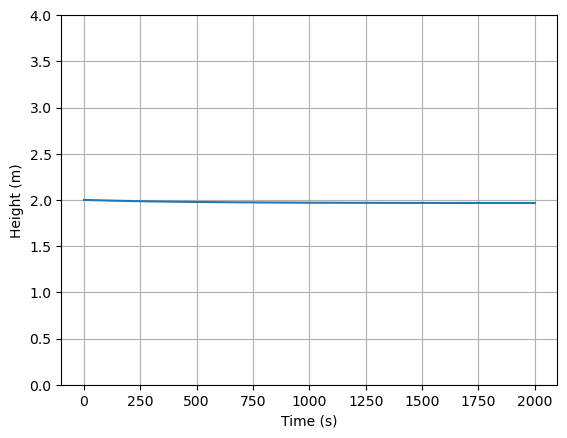

In [129]:


timestep=1 #s
time = 0 #s
endtime = 2000 #s
qin = 0.03333 #m3/s Inflow rate (2000 L/m)
rho = 1000 # density of fluid kg/m3
k = 0.002 
keff = k*math.sqrt(rho)
z = 0.12 #initial valve opening
g = 9.81 #m/s2
h_old = 2 #Initial height of water in tank in m
A = 4 #area of tank in m2

qout = keff*z*math.sqrt(g*h_old) #m3/s

h = [] #liquid level h
t = [] #time
#Include lists for flowrate in, flowrate out and valve opening
flowrate_in = []
flowrate_out = []
valve_opening = []


#inital values to lists
h.append(h_old)
t.append(time)

while (time<endtime): #controls the time simulation
    h_new = h_old + 1 / A * (qin - qout) * timestep #calculates new height with euler

    time = time + timestep #updates time


    qout = keff*z*math.sqrt(g*h_new) #updates qout
    
    h.append(h_new) #adds new height to list
    t.append(time) #adds new time to list

    h_old = h_new #updates old height

plt.plot(t,h)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.ylim(ymin=0,ymax=4)
plt.show()


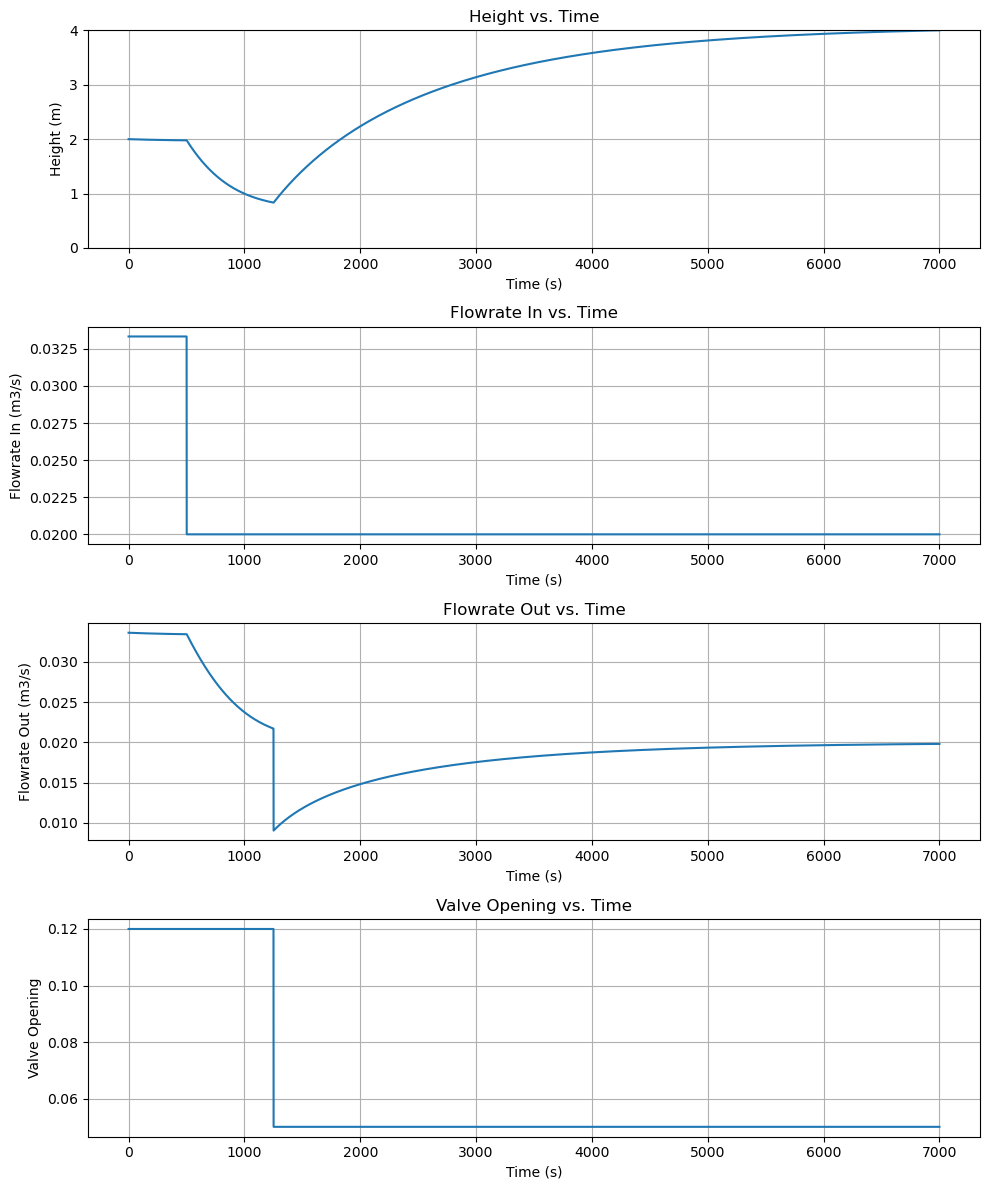

In [89]:

timestep = 1  # s
time = 0  # s
endtime = 7000 # s
rho = 1000  # density of fluid kg/m3
k = 0.002
keff = k * math.sqrt(rho)
z = 0.12  # initial valve opening
g = 9.81  # m/s2
h_old = 2  # Initial height of water in tank in m
A = 4  # area of tank in m2

qin = 0.03333
qout = keff * z * math.sqrt(g * h_old)  # m3/s

h = []  # liquid level h
t = []  # time

# Include lists for flowrate in, flowrate out, and valve opening
flowrate_in = []  # Flowrate In list
flowrate_out = []  # Flowrate Out list
valve_opening = []  # Valve Opening list

# Initial values
h.append(h_old)
t.append(time)
flowrate_in.append(qin)  # Initial value for Flowrate In
flowrate_out.append(qout)
valve_opening.append(z)

while time < endtime:  # controls the time simulation
    # Calculate new height with Euler
   
    h_new = h_old + (1 / A) * (qin - qout) * timestep

    if h_new > 4:
        h_new = 4
    if h_new < 0:
        h_new = 0

    # Update qin based on your simulation conditions
    if time > 500:
     
        qin = 0.02  # Adjust qin to a different value after 1000 seconds

    if time > 1250:
    
        z = 0.05

    time = time + timestep  # updates time

    qout = keff * z * math.sqrt(g * h_new)  # updates qout

    # Append values to respective lists
    h.append(h_new)
    t.append(time)
    flowrate_in.append(qin)
    flowrate_out.append(qout)
    valve_opening.append(z)

    h_old = h_new  # updates old height

# Create subplots for height, flowrate in, flowrate out, and valve opening
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Plot for height
axs[0].plot(t, h)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Height (m)')
axs[0].set_title('Height vs. Time')
axs[0].grid(True)
axs[0].set_ylim(ymin=0, ymax=4)

# Plot for flowrate in
axs[1].plot(t, flowrate_in)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Flowrate In (m3/s)')
axs[1].set_title('Flowrate In vs. Time')
axs[1].grid(True)

# Plot for flowrate out
axs[2].plot(t, flowrate_out)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Flowrate Out (m3/s)')
axs[2].set_title('Flowrate Out vs. Time')
axs[2].grid(True)

# Plot for valve opening
axs[3].plot(t, valve_opening)
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Valve Opening')
axs[3].set_title('Valve Opening vs. Time')
axs[3].grid(True)

plt.tight_layout()
plt.show()


## Excercise 2.3
![2.3 a new.png](<attachment:2.3 a new.png>)
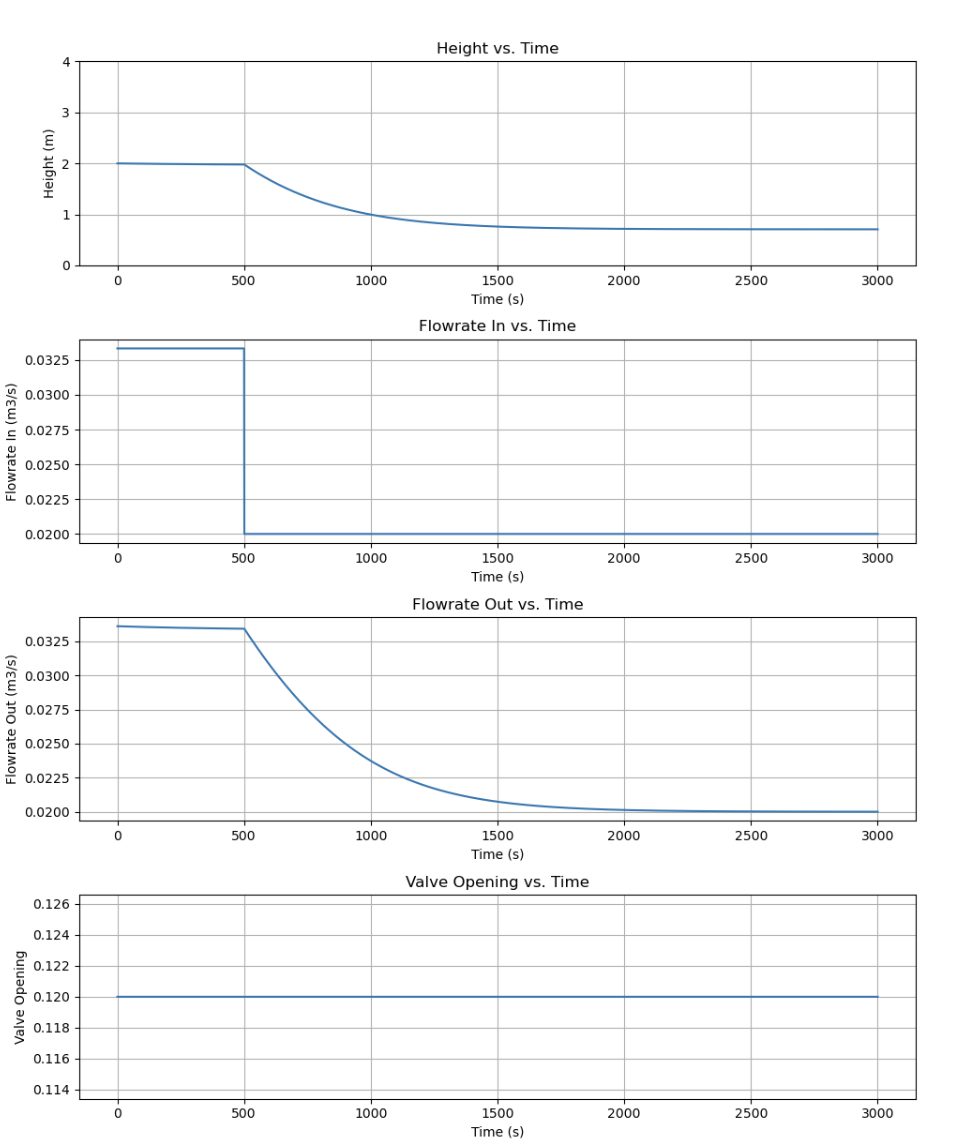

In the plots above we can observe the gradual and proportional change in the water height and flow rate out, starting at 500 seconds. When the flow rate in is instantaneously adjusted from 0.333 to 0.2, we can see that the flow rate out starts to decrease  as the water height also decreases. 

This is caused by the hydrostatic pressure on the bottom "out" valve adjusting proportionally to the water height above it, in other words, the flow across the valve will increase if the differential pressure across the valve is increased. As the water height decreases, so too does the pressure on the "out" valve decrease, and we can observe that both the water height and the flow rate out start to stabilize. 

One key thing to note is that the flow rate out stabilizes to the adjusted level of the flow rate in, at 0.2 m^3/s. In other words the flow rate out becomes equal to the flow rate in, and at this point the water height stabilizes as well.

### 2.3 second part 
![2.3 b new.png](<attachment:2.3 b new.png>)
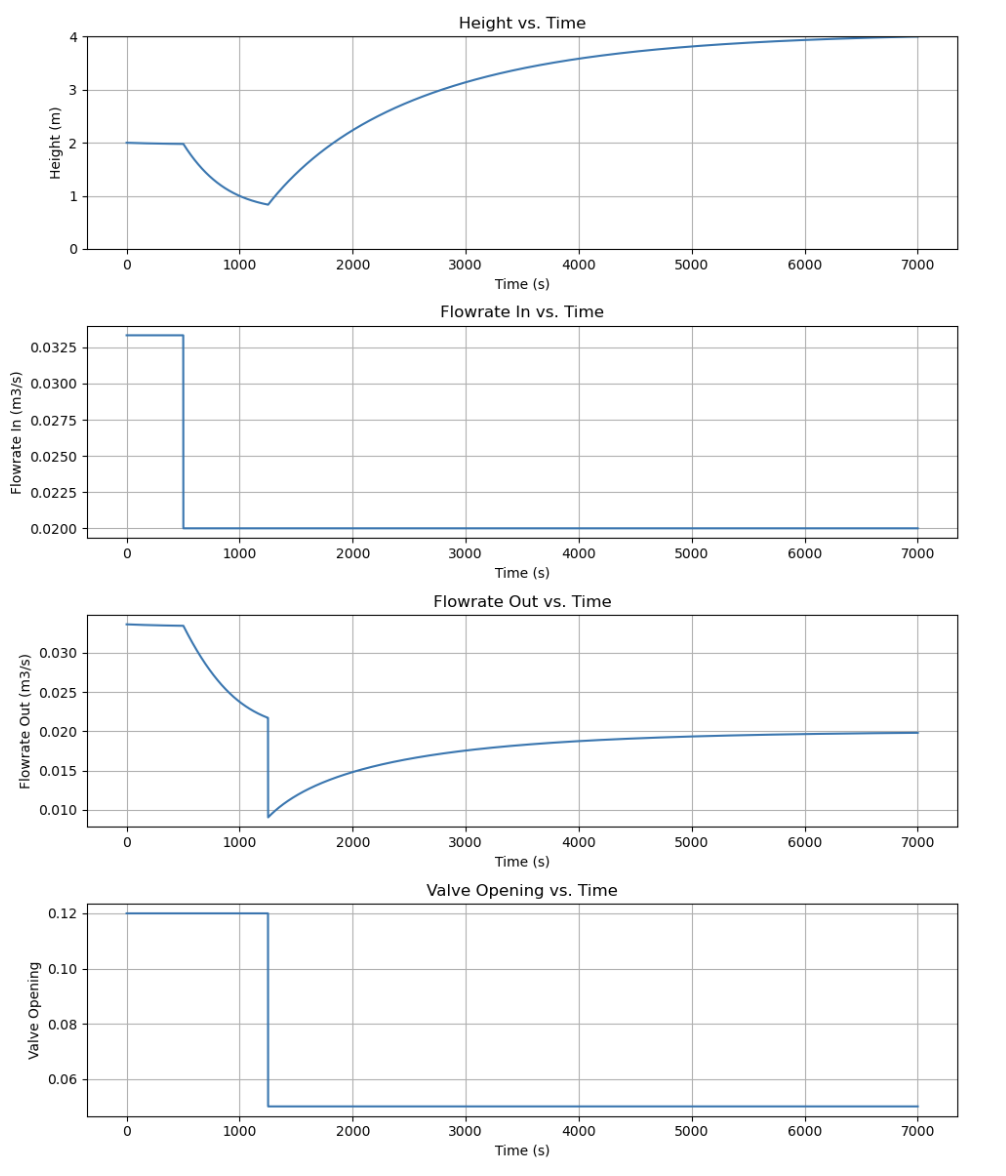

At 500 seconds we again see flow rate in decrease from 0.333 m^3/s to 0.2 m^3/s, at the same time it can be observed that both the height and flow rate out start to decrease proportionally, the reason for this is once again that at this point in time the flow rate out is greater than the flow rate in, and until the flow rates of both valves become equal, the water height will also decrease. When the water height decreases over time, so too does the differential pressure across the out valve also decrease over time, until we reach equal flow rates and stabilized pressure.

The difference in this plot from the previous plot is that at 1250 seconds the valve opening (Z) is adjusted from 0.12 to 0.05. This change causes a sharp and instant drop in flow rate out, to just below 0.10 m^3/s. The drop in flow rate out causes the water height to once again increase, which again increases the differential pressure across the "out" valve, and we can observe a steady increase in flow rate out. The flow rate out keeps steadily increasing in proportion to the rising water height until it becomes equal to the flow rate in at 0.2 m3^s. The point in time where the flow rates equalize also happens to to be around the time the water height reaches its max limit of 4m and is assumed to overflow.

### Excercise 2.4 

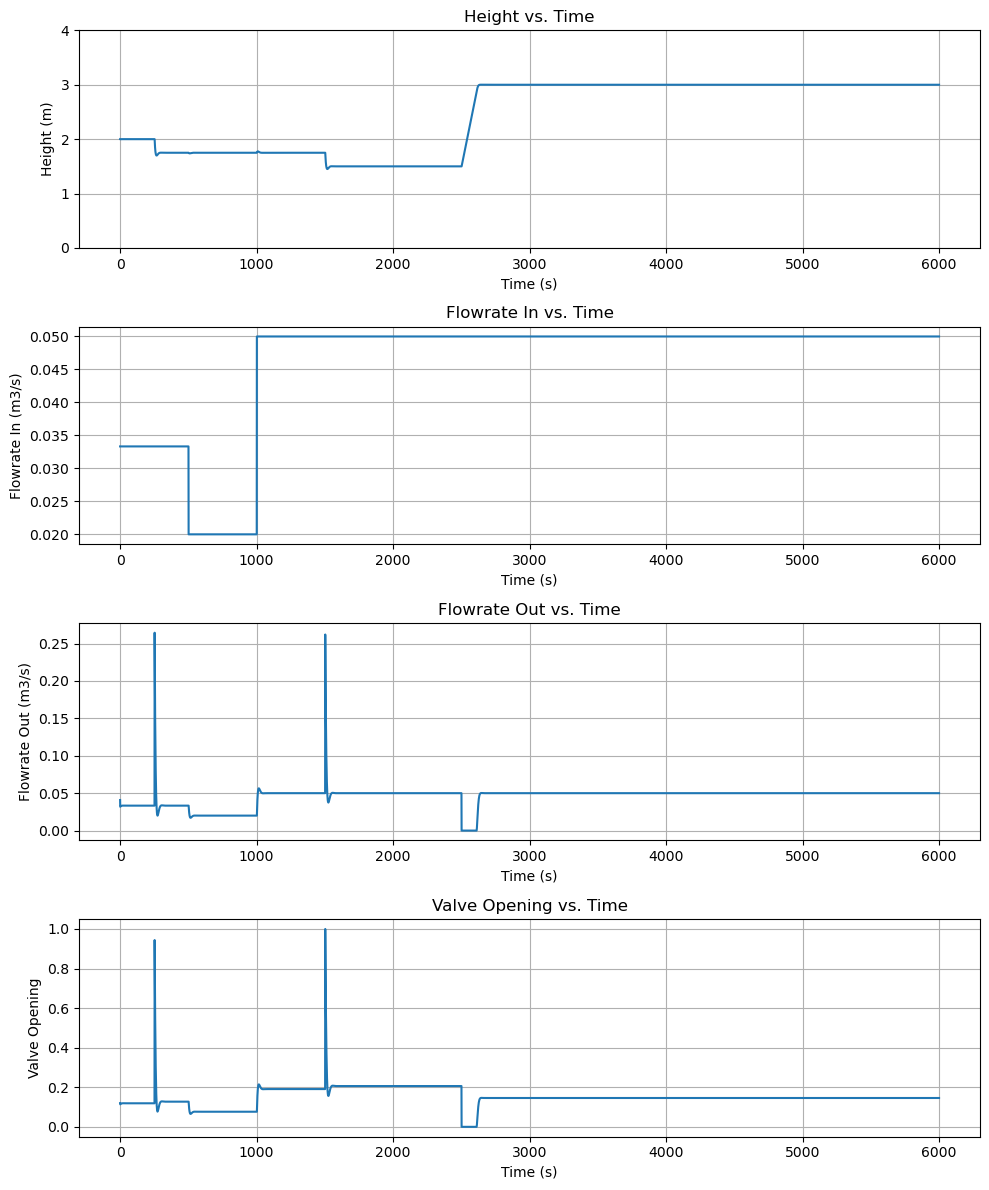

In [70]:


timestep = 1  # s
time = 0  # s
endtime = 6000  # s
rho = 1000  # density of fluid kg/m3
k = 0.002
keff = k * math.sqrt(rho)
z_old = 0.12  # initial valve opening
g = 9.81  # m/s2
h_old = 2  # Initial height of water in tank in m
A = 4  # area of tank in m2
qin = 0.03333
qout = keff * z * math.sqrt(g * h_old)  # m3/s

h = []  # liquid level h
t = []  # time

# Include lists for flowrate in, flowrate out, and valve opening
flowrate_in = []  # Flowrate In list
flowrate_out = []  # Flowrate Out list
valve_opening = []  # Valve Opening list

# PI controller parameters
Kp = 3.0  # Proportional gain
Ki = 0.3  # Integral gain
setpoint = 2.0  # Initial setpoint
error_integral = 0.0  # Initialize the integral of error

# Initial values
h.append(h_old)
t.append(time)
flowrate_in.append(qin)  # Initial value for Flowrate In
flowrate_out.append(qout)
valve_opening.append(z_old)



error_old = 0



while time < endtime:  # controls the time simulation
    # Calculate new height with Euler
    h_new = h_old + (1 / A) * (qin - qout )* timestep
    if h_new > 4:
        h_new = 4
    if h_new < 0:
        h_new = 0

    # Calculate the error
    error_new = h_new - setpoint
    
    # Calculate the change in valve opening using PI controller
    z = z_old+ Kp * (error_new - error_old) + Ki * error_new * timestep
    #implement a pid controller for z
    
    if z > 1:
        z = 1
    elif z < 0:
        z = 0
    # print(z)

    # Update valve opening with constraints
    

    # Update qin based on simulation conditions
    if time > 250:
        setpoint = 1.75  # Adjust setpoint to a different value after 250 seconds
    if time > 500:
        qin = 0.02  # Adjust qin to a different value after 500 seconds
    if time > 1000:
        qin = 0.05 # Adjust qin to a different value after 1000 seconds
    if time  > 1500: 
        setpoint = 1.5 # Adjust setpoint to a different value after 1500 seconds
    if time >= 2500:
        setpoint = 3 # Adjust setpoint to a different value after 2500 seconds

    

    # Update error 
    error_old = error_new

    time = time + timestep  # updates time

    qout = keff * z * math.sqrt(g * h_new)  # updates qout
    z_old = z

    # Append values to respective lists
    h.append(h_new)
    t.append(time)
    flowrate_in.append(qin)
   
    flowrate_out.append(qout)
    valve_opening.append(z)

    h_old = h_new  # updates old height

# Create subplots for height, flowrate in, flowrate out, and valve opening
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Plot for height
axs[0].plot(t, h)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Height (m)')
axs[0].set_title('Height vs. Time')
axs[0].grid(True)
axs[0].set_ylim(ymin=0, ymax=4)

# Plot for flowrate in
axs[1].plot(t, flowrate_in)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Flowrate In (m3/s)')
axs[1].set_title('Flowrate In vs. Time')
axs[1].grid(True)

# Plot for flowrate out
axs[2].plot(t, flowrate_out)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Flowrate Out (m3/s)')
axs[2].set_title('Flowrate Out vs. Time')
axs[2].grid(True)

# Plot for valve opening
axs[3].plot(t, valve_opening)
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Valve Opening')
axs[3].set_title('Valve Opening vs. Time')
axs[3].grid(True)

plt.tight_layout()
plt.show()


### Excercise 2.4

![Ex 2.4.png](<attachment:Ex 2.4.png>)
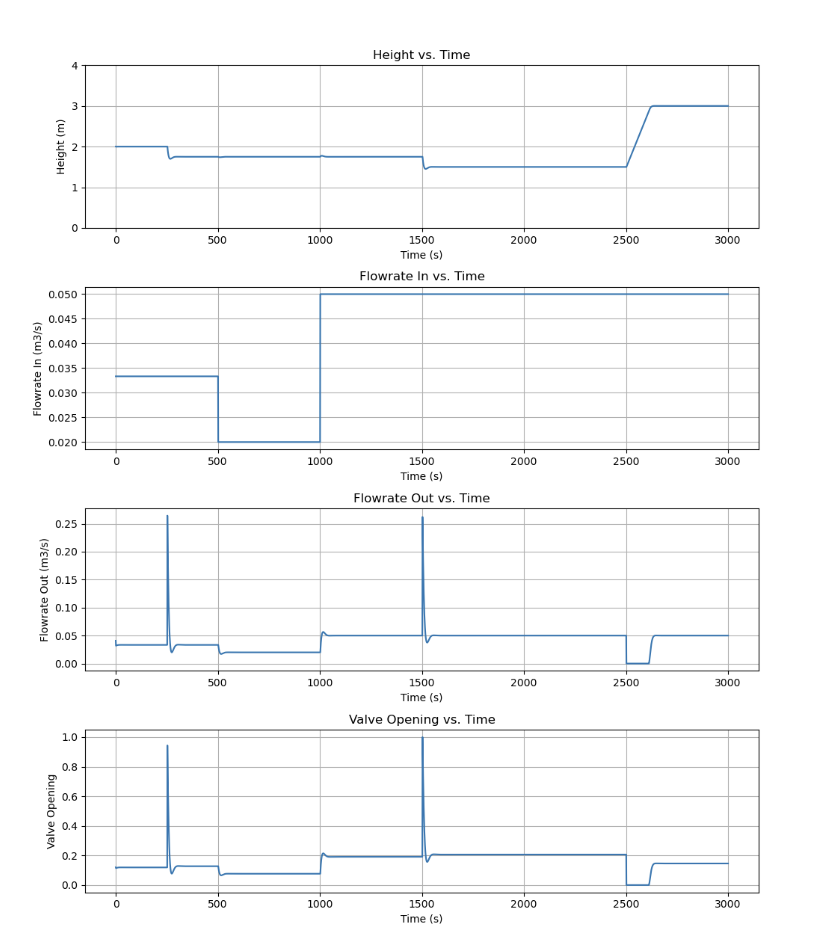